In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_palette('husl')

In [92]:
df=pd.read_csv('../data/raw/raw_dataset.csv', index_col=False)

I) Add area_id column

In [93]:
np.random.seed(42)
df['area_id']=np.random.choice([1,2,3,4,5], size=len(df))

ii) Basic info

In [94]:
#basic info
print("===== BASIC INFO =====")
#shape
print(f"\nShape: {df.shape}")

#rows
print(f"\nTotal rows: {len(df)}")

#columns and column types
print("\nColumns and column types:")
print(df.dtypes)

#first five rows
print("\nFirst five rows:")
display(df.head())



===== BASIC INFO =====

Shape: (560655, 14)

Total rows: 560655

Columns and column types:
0                                               int64
Electricity:Facility [kW](Hourly)             float64
Fans:Electricity [kW](Hourly)                 float64
Cooling:Electricity [kW](Hourly)              float64
Heating:Electricity [kW](Hourly)              float64
InteriorLights:Electricity [kW](Hourly)       float64
InteriorEquipment:Electricity [kW](Hourly)    float64
Gas:Facility [kW](Hourly)                     float64
Heating:Gas [kW](Hourly)                      float64
InteriorEquipment:Gas [kW](Hourly)            float64
Water Heater:WaterSystems:Gas [kW](Hourly)    float64
Class                                          object
theft                                          object
area_id                                         int64
dtype: object

First five rows:


,0,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly),Class,theft,area_id
0,0,22.035977,3.586221,0.0,0.0,4.589925,8.1892,136.585903,123.999076,3.33988,9.246947,FullServiceRestaurant,Normal,4
1,1,14.649757,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,Normal,5
2,2,14.669567,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,Normal,3
3,3,14.677808,0.000000,0.0,0.0,1.529975,7.4902,3.931932,0.000000,3.33988,0.592052,FullServiceRestaurant,Normal,5
4,4,14.824794,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,Normal,5


iii) Missing Values

In [95]:
#missing values
print("===== MISSING VALUES =====")
missing=df.isnull().sum()
if missing.sum()==0:
    print("No missing values")
else:
    print(missing[missing>0])

===== MISSING VALUES =====
No missing values


iv) Target Variable

In [96]:
#target variable (theft)
print("===== TARGET VARIABLE (Theft) =====")
print(df['theft'].value_counts())
print("\nPercentages: ")
print(df['theft'].value_counts(normalize=True)*100)

===== TARGET VARIABLE (Theft) =====
theft
Normal    331824
Theft1     51083
Theft3     44349
Theft4     41460
Theft6     35413
Theft5     33553
Theft2     22973
Name: count, dtype: int64

Percentages: 
theft
Normal    59.185060
Theft1     9.111307
Theft3     7.910212
Theft4     7.394922
Theft6     6.316362
Theft5     5.984607
Theft2     4.097529
Name: proportion, dtype: float64


v) Convert Theft to Binary Feature

In [97]:
#convert theft columns to single binary feature
print(f"===== CONVERT THEFT TO BINARY FEATURE =====")
df['theft_binary']=df['theft'].apply(lambda x: 'Theft' if x!='Normal' else 'Normal')

print(f"\nShape: ")
print(df.shape)

print(f"\nBinary Distribution: ")
print(df['theft_binary'].value_counts())

print("\nPercentages: ")
print(df['theft_binary'].value_counts(normalize=True)*100)


===== CONVERT THEFT TO BINARY FEATURE =====

Shape: 
(560655, 15)

Binary Distribution: 
theft_binary
Normal    331824
Theft     228831
Name: count, dtype: int64

Percentages: 
theft_binary
Normal    59.18506
Theft     40.81494
Name: proportion, dtype: float64


vi) Unique Values in Each Feature

In [98]:
#unique values 
print("===== UNIQUE VALUES IN EACH FEATURE =====")


for f in df.columns:
    unique_count=df[f].nunique()
    if (unique_count)<25:
        print(f"\nNumber of unique values of {f}: {unique_count}")
        print(f"\nUnique values of {f}: {df[f].unique()}")



===== UNIQUE VALUES IN EACH FEATURE =====

Number of unique values of Class: 17

Unique values of Class: ['FullServiceRestaurant' 'Hospital' 'LargeHotel' 'LargeOffice'
 'MediumOffice' 'MidriseApartment' 'OutPatient' 'PrimarySchool'
 'QuickServiceRestaurant' 'SecondarySchool' 'SmallHotel' 'SmallOffice'
 'Stand-aloneRetail' 'StripMall' 'SuperMarket' 'Warehouse' '0']

Number of unique values of theft: 7

Unique values of theft: ['Normal' 'Theft5' 'Theft6' 'Theft2' 'Theft3' 'Theft4' 'Theft1']

Number of unique values of area_id: 5

Unique values of area_id: [4 5 3 2 1]

Number of unique values of theft_binary: 2

Unique values of theft_binary: ['Normal' 'Theft']


vii) Investigate Unknown Class Rows

In [99]:
#0 as a value of Class (supposed to denote the location) is suspicious, as it is supposed to be a string.
#We analyse how many of these Class values are 0, and if we can drop these rows to avoid confusion.

print("===== INVESTIGATE UNKNOWN CLASS ROWS =====")

print(df['Class'].value_counts())

theft_class0=len((df[(df['Class']=='0') & (df['theft_binary']=='Theft')]))

print(f"\nNumber of thefts with unknown Class: {theft_class0}")

print(f"\nPercentage of thefts within unkown Class rows: {(theft_class0/len(df[df['Class']=='0'])*100):.2f}%")


print(f"\nPercentage of unknown Class rows within total thefts: {(theft_class0/len(df[df['theft_binary']=='Theft'])*100):.2f}%")




===== INVESTIGATE UNKNOWN CLASS ROWS =====
Class
FullServiceRestaurant     35040
Hospital                  35040
LargeHotel                35040
LargeOffice               35040
MediumOffice              35040
MidriseApartment          35040
OutPatient                35040
PrimarySchool             35040
QuickServiceRestaurant    35040
SecondarySchool           35040
SmallHotel                35040
SmallOffice               35040
Stand-aloneRetail         35040
StripMall                 35040
SuperMarket               35040
Warehouse                 35040
0                            15
Name: count, dtype: int64

Number of thefts with unknown Class: 15

Percentage of thefts within unkown Class rows: 100.00%

Percentage of unknown Class rows within total thefts: 0.01%


viii) Drop 15 rows with unknown Class

In [100]:
print("===== DROP 15 ROWS WITH UNKNOWN CLASS =====")
print(f"\nOld Shape: {df.shape}")
df=df[df['Class']!='0']
print(f"\nDropped {theft_class0} rows with unkown Class")

print(f"New shape: {df.shape}")

===== DROP 15 ROWS WITH UNKNOWN CLASS =====

Old Shape: (560655, 15)

Dropped 15 rows with unkown Class
New shape: (560640, 15)


ix) Consumption Columns, No. of Zero Consumption Rows & Proportion of Theft

In [101]:
print(f"===== ZERO CONSUMPTION ROWS AND PROPORTION OF THEFT IN THEM =====")

#check how many consumption columns
cons_col=[col for col in df.columns if 'kW' in col]
print(f"\nNumber of consumption columns: {len(cons_col)}")

#number of rows with all types of consumption zero
zero_mask=(df[cons_col]==0).all(axis=1)
print(f"\nAll-zero consumption rows: {zero_mask.sum():,} ({(zero_mask.sum()/len(df))*100:.2f}%)")

if zero_mask.sum()>0:

    #analyse type of theft across all-zero rows
    print("\nTheft distribution across zero rows: ")
    print(df[zero_mask]['theft'])

    #number of thefts in all-zero rows
    print("\nBinary Theft distribution across zero rows: ")
    print(df[zero_mask]['theft_binary'].value_counts())

    #percentage of theft in zero rows
    percentage= df[zero_mask]['theft_binary'].value_counts().sum()/(zero_mask.sum())*100
    print(f"\nPercentage of theft from zero consumption rows: {percentage}%")
    
   

===== ZERO CONSUMPTION ROWS AND PROPORTION OF THEFT IN THEM =====

Number of consumption columns: 10

All-zero consumption rows: 22,958 (4.09%)

Theft distribution across zero rows: 
274       Theft2
275       Theft2
276       Theft2
277       Theft2
278       Theft2
           ...  
560640    Theft2
560641    Theft2
560642    Theft2
560643    Theft2
560644    Theft2
Name: theft, Length: 22958, dtype: object

Binary Theft distribution across zero rows: 
theft_binary
Theft    22958
Name: count, dtype: int64

Percentage of theft from zero consumption rows: 100.0%


x) Duplicate rows

In [102]:
print(f"===== DUPLICATES =====")

num_dup=df.value_counts().sum()
print(f"\nNumber of duplicate rows: {num_dup:,}")

if num_dup>0:
    print("\nFirst few duplicates:")
    print(df[df.duplicated(keep=False)].head())

===== DUPLICATES =====

Number of duplicate rows: 560,640

First few duplicates:
Empty DataFrame
Columns: [0, Electricity:Facility [kW](Hourly), Fans:Electricity [kW](Hourly), Cooling:Electricity [kW](Hourly), Heating:Electricity [kW](Hourly), InteriorLights:Electricity [kW](Hourly), InteriorEquipment:Electricity [kW](Hourly), Gas:Facility [kW](Hourly), Heating:Gas [kW](Hourly), InteriorEquipment:Gas [kW](Hourly), Water Heater:WaterSystems:Gas [kW](Hourly), Class, theft, area_id, theft_binary]
Index: []


xi) Plotting Target Distribution

===== PLOTTING TARGET DISTRIBUTION =====


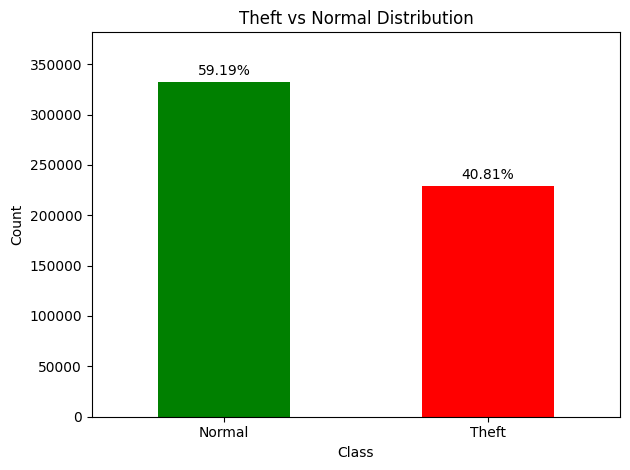

<Figure size 640x480 with 0 Axes>

In [103]:
print(f"===== PLOTTING TARGET DISTRIBUTION =====")

series=df['theft_binary'].value_counts()
total=series.sum()

fig,ax=plt.subplots()
series.plot(kind='bar', ax=ax, color=['green','red'])

percents=[f'{(v/total*100):.2f}%' for v in series]

ax.bar_label(ax.containers[0], labels=percents, padding=3)

ax.set_ylim(0, series.max() * 1.15)
plt.title('Theft vs Normal Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

plt.savefig('../outputs/theft_vs_normal_bar.png', dpi=300, bbox_inches='tight')


xii) Histogram (Theft vs Normal)

===== HISTOGRAM (THEFT VS NORMAL) =====

Insight: Look for features where theft (red) and normal (green) distributions differ significantly


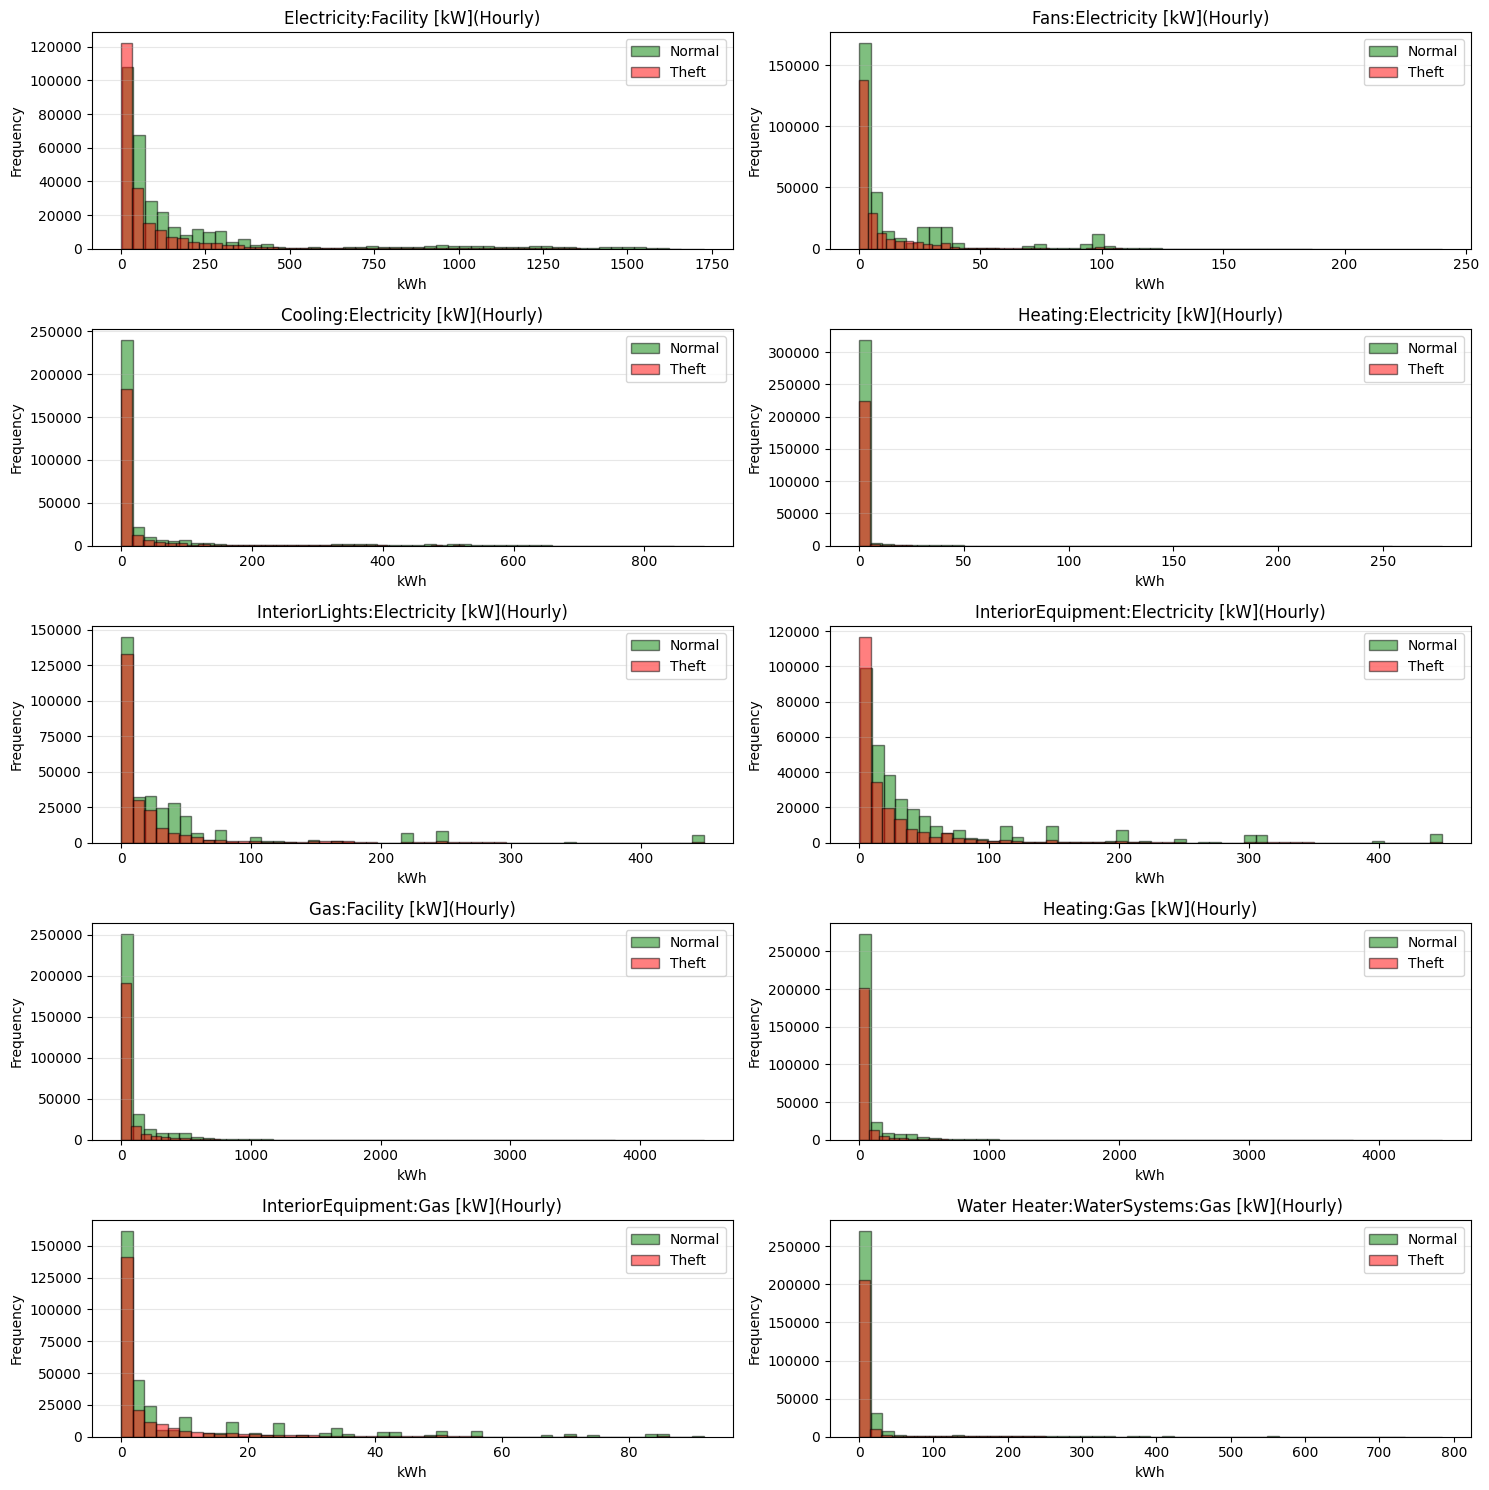

In [104]:
print(f"===== HISTOGRAM (THEFT VS NORMAL) =====")
print("\nInsight: Look for features where theft (red) and normal (green) distributions differ significantly")




fig, axes=plt.subplots(5,2,figsize=(15,15))
axes=axes.flatten()

for i, col in enumerate(cons_col):
    theft_data=df[df['theft_binary']=='Theft'][col]
    normal_data=df[df['theft_binary']=='Normal'][col]

    axes[i].hist(normal_data, bins=50, alpha=0.5, label='Normal', color='green', edgecolor='black')
    axes[i].hist(theft_data, bins=50, alpha=0.5, label='Theft', color='red', edgecolor='black')

    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('kWh')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
    axes[i].grid(axis='y', alpha=0.3)
    

plt.tight_layout()
plt.savefig('../outputs/theft_vs_normal_hist.png', dpi=300, bbox_inches='tight')
plt.show()

xii) Correlation Matrix 

===== CORRELATION MATRIX =====


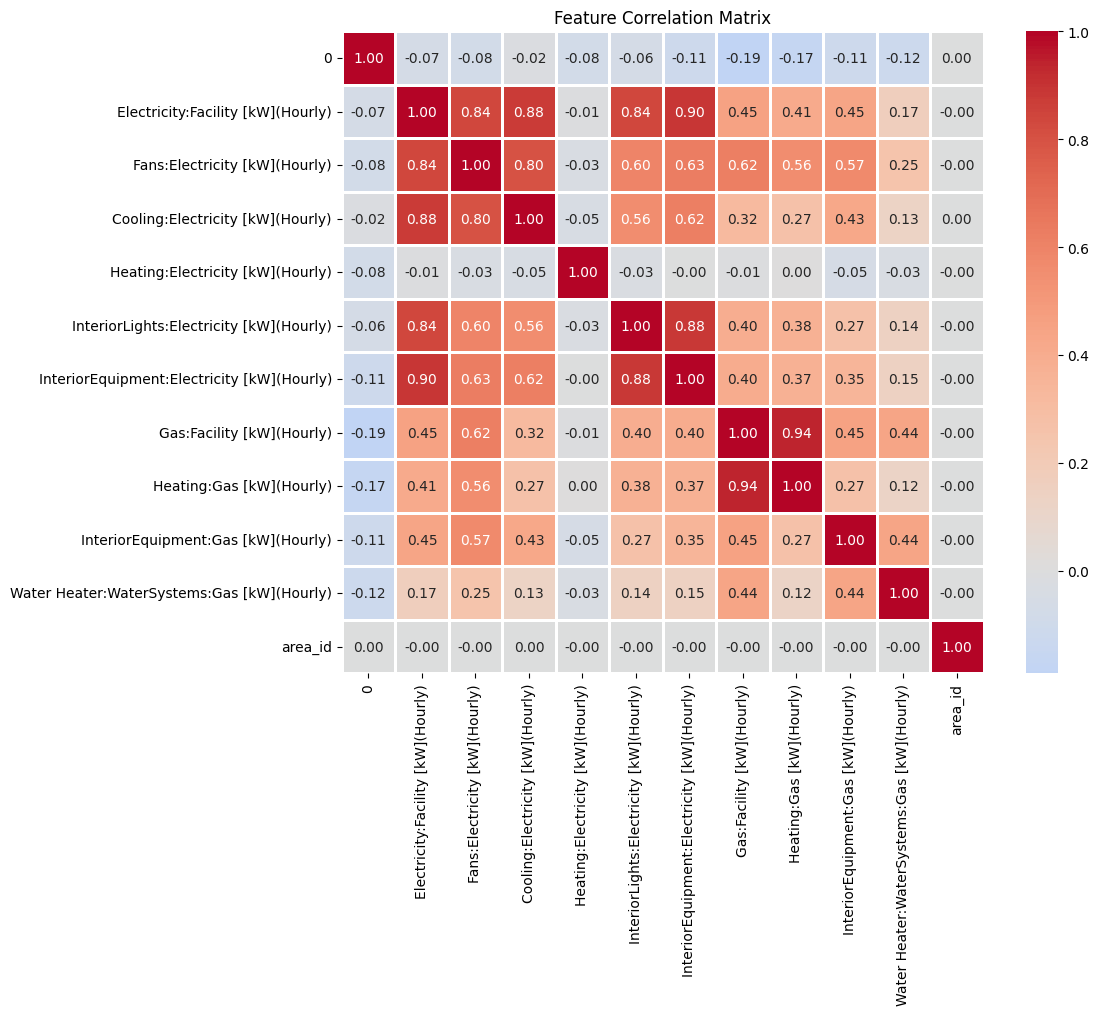

In [105]:
print(f"===== CORRELATION MATRIX =====")

num_cols=df.select_dtypes(include=[np.number]).columns
corr=df[num_cols].corr()



plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True, linewidths=1)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.savefig('../outputs/feature_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

xiii) One Hot-Encoding

In [106]:
print("===== ONE-HOT ENCODING =====")
print(f"\nBefore Encoding")
print(f"Columns: {len(df.columns)}")
print(f"Shape: {df.shape}")

df_encoded=pd.get_dummies(df, columns=['Class'], drop_first=False)

print(f"\nAfter encoding: ")
print(f"Columns: {len(df_encoded.columns)}")
print(f"Shape: {df_encoded.shape}")

class_cols=[col for col in df_encoded.columns if col.startswith('Class_')]
print(f"\nNewly created Class columns ({len(class_cols)}): ")
for col in sorted(class_cols):
    print(f" - {col}")



===== ONE-HOT ENCODING =====

Before Encoding
Columns: 15
Shape: (560640, 15)

After encoding: 
Columns: 30
Shape: (560640, 30)

Newly created Class columns (16): 
 - Class_FullServiceRestaurant
 - Class_Hospital
 - Class_LargeHotel
 - Class_LargeOffice
 - Class_MediumOffice
 - Class_MidriseApartment
 - Class_OutPatient
 - Class_PrimarySchool
 - Class_QuickServiceRestaurant
 - Class_SecondarySchool
 - Class_SmallHotel
 - Class_SmallOffice
 - Class_Stand-aloneRetail
 - Class_StripMall
 - Class_SuperMarket
 - Class_Warehouse


viii) Save Cleaned Data

In [107]:
output_path='../data/processed/processed_dataset.csv'

df.to_csv(output_path, index=False)

print(f"===== SAVING PROCESSED DATASET =====")
print(f"\nProcessed Dataset saved to {output_path}")
print(f"\nFinal Shape: {df.shape}")
print(f"\nFinal Columns: \n{df.dtypes} ")

train_feats=[col for col in df_encoded.columns if col not in ['0','theft','Class', 'area_id', 'theft', 'theft_binary']]

print(f"\nFinal Features for Training ({len(train_feats)}): ")
for col in train_feats:
    print(f" - {col}")


counts=df_encoded['theft_binary'].value_counts()
percentages=(df_encoded['theft_binary'].value_counts(normalize=True)*100)
dist_df=pd.concat([counts, percentages], axis=1)
dist_df.columns=['Number','Percentage']

print(f"\nFinal target distribution: ")
display(dist_df)

print(f"\nREADY FOR MODEL TRAINING!")


===== SAVING PROCESSED DATASET =====

Processed Dataset saved to ../data/processed/processed_dataset.csv

Final Shape: (560640, 15)

Final Columns: 
0                                               int64
Electricity:Facility [kW](Hourly)             float64
Fans:Electricity [kW](Hourly)                 float64
Cooling:Electricity [kW](Hourly)              float64
Heating:Electricity [kW](Hourly)              float64
InteriorLights:Electricity [kW](Hourly)       float64
InteriorEquipment:Electricity [kW](Hourly)    float64
Gas:Facility [kW](Hourly)                     float64
Heating:Gas [kW](Hourly)                      float64
InteriorEquipment:Gas [kW](Hourly)            float64
Water Heater:WaterSystems:Gas [kW](Hourly)    float64
Class                                          object
theft                                          object
area_id                                         int64
theft_binary                                   object
dtype: object 

Final Features for Traini

,Number,Percentage
theft_binary,,
Normal,331824,59.186644
Theft,228816,40.813356



READY FOR MODEL TRAINING!
